In [33]:
#Importando bibliotecas

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [34]:
normalize = lambda x: (x - x.min()) / (x.max() - x.min() + 1e-6)
imgGray = cv2.imread("transladada.png", flags=0)  # flags=0 Ler como imagem em tons de cinza

In [35]:
# transformada de Fourier
# fft = np.fft.fft2(imgGray.astype(np.float32))
fft = np.fft.fft2(imgGray)  # np.fft.fft2 Implemente a Transformada de Fourier


In [36]:
# Descentralizado, calcula os espectros de magnitude e fase
ampSpectrum = np.sqrt(np.power(fft.real, 2) + np.power(fft.imag, 2))  # Espectro de amplitude
print("ampSpectrum max={}, min={}".format(ampSpectrum.max(), ampSpectrum.min()))
phase = np.arctan2(fft.imag, fft.real)  # Calcule o ângulo de fase (radianos)
# phiSpectrum = phase / np.pi*180  #Converta o ângulo de fase para o intervalo [-180, 180]
phiSpectrum = np.angle(fft)

ampSpectrum max=94228723.0, min=0.01652308621480126


In [37]:
# Centralização, movendo os componentes de baixa frequência para o centro da imagem no domínio da frequência
fftShift = np.fft.fftshift(fft)  # Mover componentes de baixa frequência para o centro da imagem de domínio de frequência

In [38]:
# Espectro de Amplitude Centrado
ampSpeShift = np.sqrt(np.power(fftShift.real, 2) + np.power(fftShift.imag, 2))
ampShiftNorm = np.uint8(normalize(ampSpeShift)*255)  # normalizado para [0,255]

In [39]:
# O espectro de magnitude é logaritmicamente transformado
ampSpeLog = np.log(1 + ampSpeShift)  # O espectro de magnitude é transformado em log para facilitar a exibição
ampSpeLog = np.uint8(normalize(ampSpeLog)*255)  # normalizado para [0,255]

In [40]:
# np.fft.ifft2 Implemente a transformada inversa de Fourier de uma imagem
invShift = np.fft.ifftshift(fftShift)  #Transforme inversamente as baixas frequências de volta para os cantos da imagem
imgIfft = np.fft.ifft2(invShift)  # Transformada inversa de Fourier, o valor de retorno é uma matriz de números complexos
imgRebuild = np.abs(imgIfft)  # Redimensione a matriz de números complexos para o espaço em tons de cinza

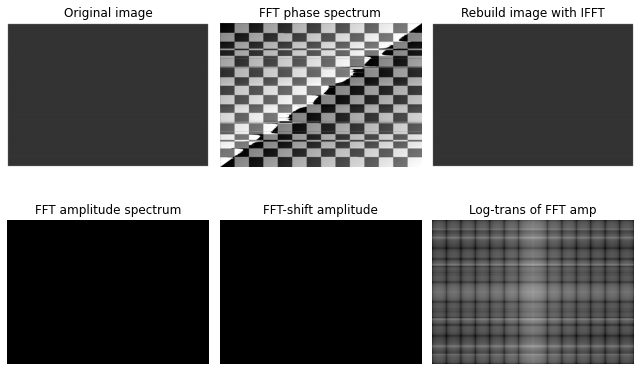

In [41]:
#Plotando os gráficos:
plt.figure(figsize=(9, 6))
plt.subplot(231), plt.title("Original image"), plt.axis('off')
plt.imshow(imgGray, cmap='gray')
plt.subplot(232), plt.title("FFT phase spectrum"), plt.axis('off')
plt.imshow(phiSpectrum, cmap='gray')
plt.subplot(233), plt.title("Rebuild image with IFFT"), plt.axis('off')
plt.imshow(imgRebuild, cmap='gray')
plt.subplot(234), plt.title("FFT amplitude spectrum"), plt.axis('off')
plt.imshow(ampSpectrum, cmap='gray')
plt.subplot(235), plt.title("FFT-shift amplitude"), plt.axis('off')
plt.imshow(ampSpeShift, cmap='gray')
plt.subplot(236), plt.title("Log-trans of FFT amp"), plt.axis('off')
plt.imshow(ampSpeLog, cmap='gray')
plt.tight_layout()
plt.show()


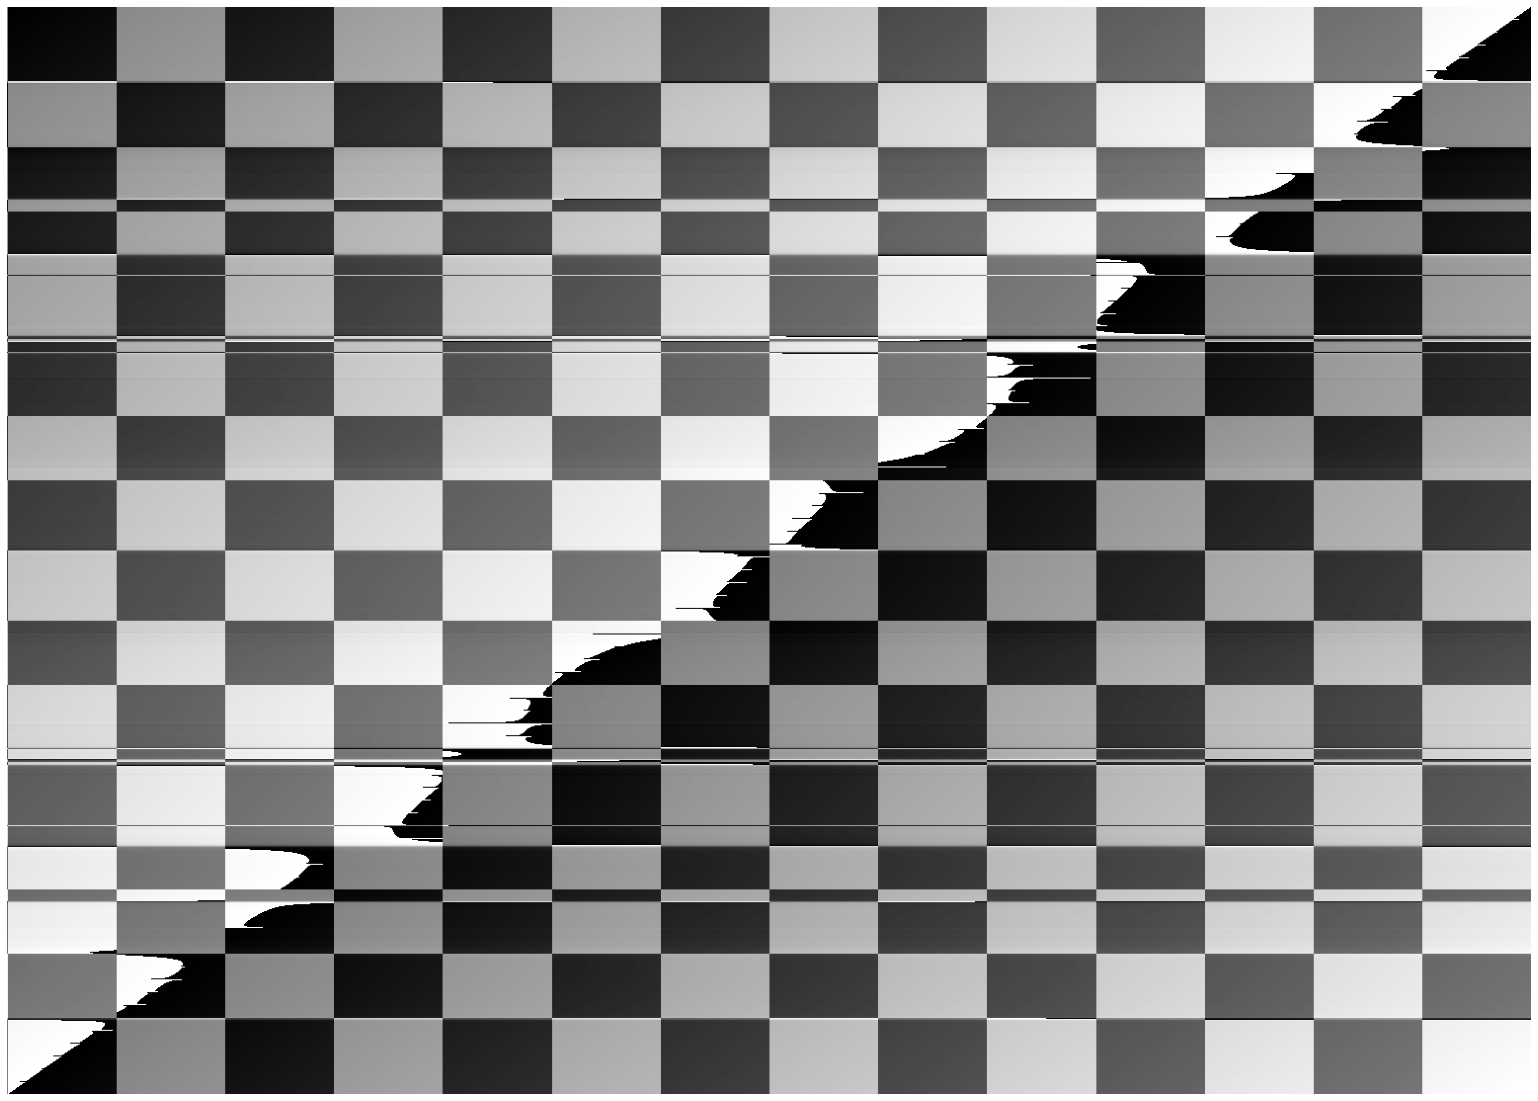

In [42]:
fig = plt.figure(figsize=(40, 20))
plt.imshow(phiSpectrum, cmap= plt.cm.gray)
plt.axis('off') #parar de mostrar os eixos
plt.show()

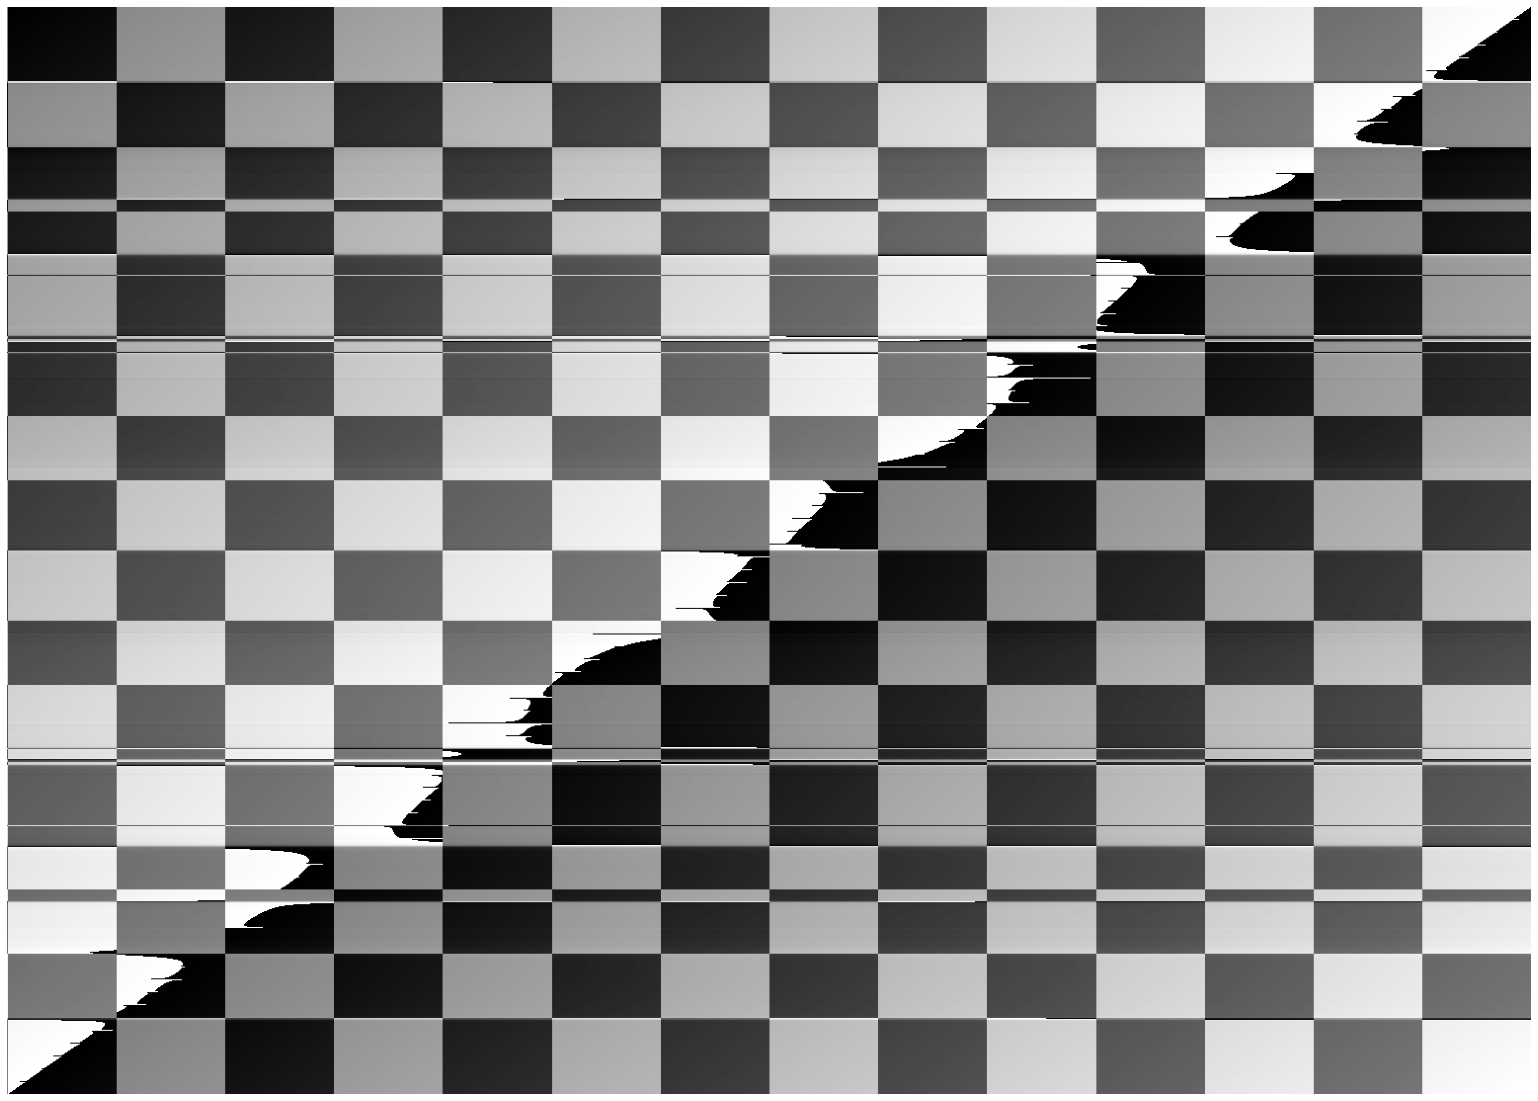

In [43]:
fig = plt.figure(figsize=(40, 20))
plt.imshow(phase, cmap= plt.cm.gray)
plt.axis('off') #parar de mostrar os eixos
plt.show()